In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('co2.csv')
df.describe()

,engine,cylandr,fuelcomb,out1
count,500.000000,500.000000,500.000000,500.000000
mean,3.600400,6.132000,12.476600,268.026000
std,1.478191,1.832291,3.943025,67.099673
min,1.000000,4.000000,4.800000,110.000000
25%,2.000000,4.000000,9.500000,217.000000
50%,3.600000,6.000000,11.650000,260.000000
75%,5.000000,8.000000,14.800000,317.000000
max,6.800000,12.000000,25.800000,488.000000


<Axes: xlabel='out1', ylabel='count'>

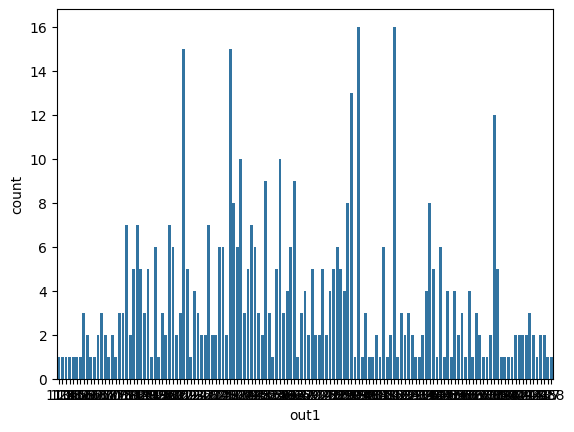

In [ ]:
sns.countplot(x='out1', data=df)

<Axes: >

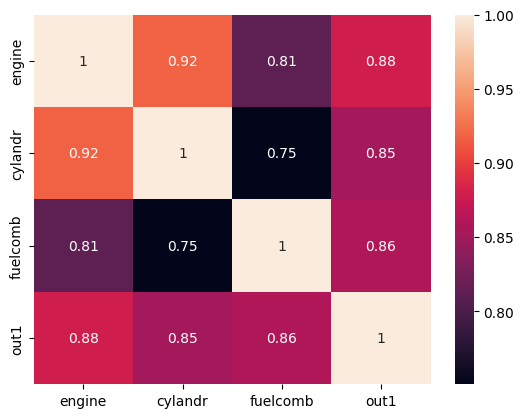

In [ ]:
plt.subplots()
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df[['engine', 'cylandr', 'fuelcomb']]
y = df['out1']

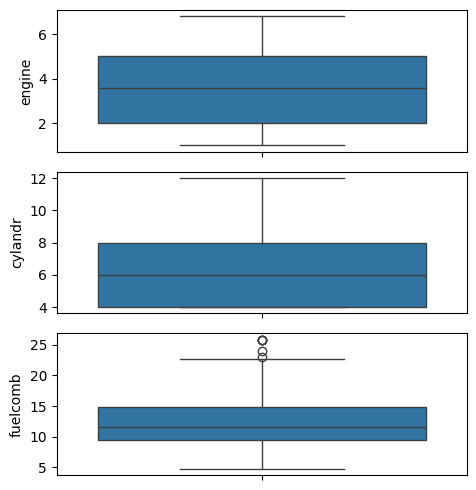

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['engine'], ax = axs[0])
plt2 = sns.boxplot(df['cylandr'], ax = axs[1])
plt3 = sns.boxplot(df['fuelcomb'], ax = axs[2])
plt.tight_layout()

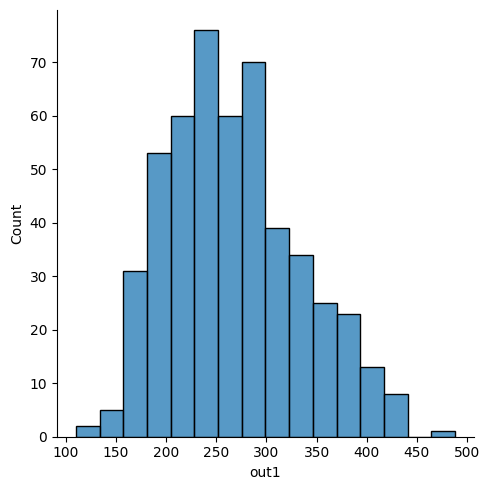

In [ ]:
sns.displot(df['out1']);

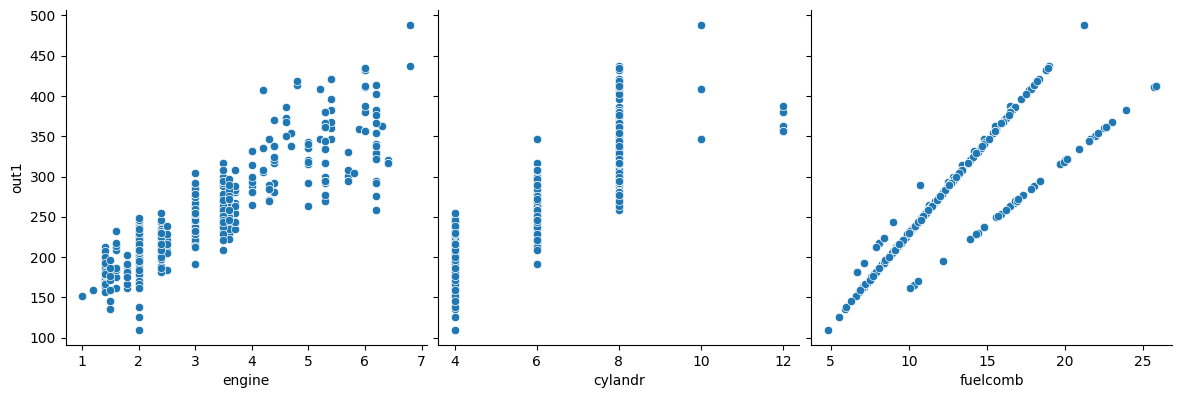

In [ ]:
sns.pairplot(df, x_vars=['engine', 'cylandr' , 'fuelcomb'], y_vars='out1', height=4, aspect=1, kind='scatter')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)
list(zip(X , model.coef_))

73.44019684508402


[('engine', 14.07669100141069),
 ('cylandr', 9.00878286373355),
 ('fuelcomb', 7.083834251783261)]

In [ ]:
y_pred = model.predict(X_test)
X_pred = model.predict(X_train)

In [ ]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
model_diff

,Actual value,Predicted value
181,377,346.441366
419,292,304.948685
363,235,209.938143
232,200,203.722875
266,294,350.341522
...,...,...
362,346,375.006618
121,317,305.837532
263,317,316.605298
341,193,189.558501


In [ ]:
X_test.engine

,engine
181,6.2
419,5.0
363,2.0
232,2.4
266,5.3
...,...
362,5.4
121,4.4
263,5.3
341,1.4


In [ ]:
sm.mean_squared_error(y_test, y_pred)

757.147131437563